# Transmissão de Energia Sem Fio (WPT)

Eletromagnetismo e Ondulatória - Engenharia da Computação 

Professor : Carlos Marmo

Grupo:
- Ana Laiz Farias
- João Antônio
- Pedro Lacerda
- Ananda Campelo

# Etapa 1 - Parte 1

### Diagrama do modelo eletrodinâmico do circuito WPT

<div style="text-align:center">
    <img src="img/circuito_esquematico.png" width="1000" />
</div>


# Etapa 1 - Parte 2

#### Importando bibliotecas utilizadas no projeto

In [113]:
from cmath import *
from numpy import linalg, round
import numpy as np
import matplotlib.pyplot as plt
import math 

#### Definindo parâmetros para os cálculos:

In [114]:
R_1 = 1.884
R_2 = 1.883
R_C = 220

# Por design do circuito, assume-se valores para L1 e C1 e supõe-se que C2 e L2 serão iguais a suas contrapartidas do circuito primério.
L_1 = 614.7 * 10**(-6)
L_2 = 650.9 * 10**(-6)

C_1 = 0.1 * 10**(-6)
C_2 = C_1

# V1 padrão para a simulação e testagem
V_1 = 9

#A frequencia de ressonancia
w_ref = 1 / math.sqrt(((L_1)) * C_1)
f_ref = w_ref / (2*np.pi)

print(f'A frequência de ressonância do circuito é {round(abs(f_ref))}')

A frequência de ressonância do circuito é 20300.0


## Etapa 1 - Parte 3

#### A função "resultados" devolve os valores de $ I_1 , I_2, I_C , V_2 $ 

<div style="text-align:center">
    <img src="img/malhas.png" width="1000" />
</div>


##### Fazendo os calculos da malha 2: 

$$ Z_{eq} = \frac{\frac{1}{j\omega{C}_{2}}R_{C}}{\frac{1}{j\omega{C}_{2}}+R_{C}} = \frac{R_{C}}{j\omega{R}_{C}{C}_{2} +1} $$

$$ j\omega M\hat{I}_{1} =  j\omega{L}_{2}\hat{I}_{2} + R_{2}\hat{I}_{2} + Z_{eq}\hat{I}_{2}$$

##### Fazendo os calculos da malha 1:

$$ \hat{V}_{f} = R_{1}\hat{I}_{1} + j\omega{L}_{1}\hat{I}_{1} + \frac{1}{j\omega{C}_{1}}\hat{I}_{1} - j\omega M\hat{I}_{2} $$

##### Matriz a ser resolvida

$$\begin{bmatrix} {R}_{1} + j\omega{L}_{1} + \frac{1}{j\omega{C}_{1}} & - j\omega M  \\ - j\omega M & j\omega{L}_{2} + R_{2} + Z_{eq}   \end{bmatrix} \begin{bmatrix} \hat{I}_{1} \\ \hat{I}_{2}  \end{bmatrix} = \begin{bmatrix} \hat{V}_{f} \\ 0  \end{bmatrix}$$

##### A função "resultados" foi estabelecida para resolver o circuito, levando em consideração uma frequência de ressonância e um coeficiente de acoplamento como parâmetros essenciais. Essas variáveis foram definidas com o propósito de simplificar a aplicação da função nas diversas análises da etapa 1. Importante observar que, de forma padrão, as variáveis estão configuradas para os valores utilizados na simulação inicial.

In [115]:
def parametros(w, k, Uf = V_1, RC = R_C, R1 = R_1, R2 = R_2, L1 = L_1, L2=L_2, C1=C_1, C2=C_2):

    '''para a malha 1, considerando Z = R + jX'''
    X_L1 = 1j*w*L1
    X_C1 = 1/(1j*w*C1)

    #Calculando a impedância equivalente da malha 1
    Z_eq1 = R1 + X_L1 + X_C1

    '''Para a malha 2, considerando Z = R + jX'''
    X_L2 = 1j*w*L2
    X_C2 = 1/(1j*w*C2)

    #calculando impedância equivalente entre o capacitor(C2) e o resistor (RC)
    Z_cr = ( RC* X_C2) / ( RC+ X_C2) 
    # Agora calculando a impedância equivalente da malha 2 inteira 
    Z_eq2 = R2 + X_L2 + Z_cr 

    ''' Agora, fazendo o Calculo de M e da sua impedância'''
    M = k*math.sqrt(L1*L2)
    X_M = 1j*w*M

    Z = np.array([[Z_eq1, -X_M],[-X_M,  Z_eq2]])
    V = np.array([V_1, 0])

    #Com base nisso podemos calcular as corrente 
    I1,I2 = np.dot(linalg.inv(Z), V)
    V2 = Z_cr * I2
    IC = V2 / RC

    return I1,I2,V2,IC

##### Posteriormente, plotaremos o gráfico da corrente $I_1, I_2$ em relação à frequência, com o objetivo de identificar a frequência mais apropriada por meio da análise visual do comportamento da corrente em função da frequência. Além disso, poderemos observar como a corrente em um circuito RC (ou seja, $V_2$) varia com as mudanças na frequência, considerando os componentes especificados.






### Gráficos das Correntes $ I_1 , I_2 $ x Frequência

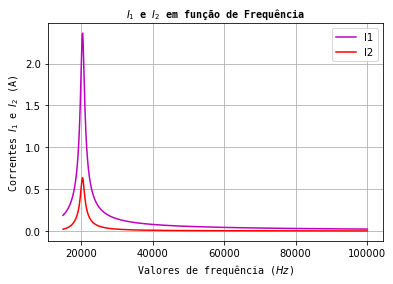

Frequência para corrente máxima é: 20449.04490449045


In [116]:
lista_frequencias = np.linspace(15000,100000,10000)
I1_params = []
I2_params = []
for f in lista_frequencias:
    w = 2*np.pi*f
    I1,I2, _, _ = parametros(w,0.1) # k = 0.1
    I1_params.append(abs(I1))
    I2_params.append(abs(I2))


I2max = max(I2_params)
#Descobre a respectiva frequência para corrente máxima
f_max= lista_frequencias[I2_params.index(I2max)]

plt.plot(lista_frequencias,I1_params,'m',label = ("I1"))
plt.plot(lista_frequencias,I2_params,'r',label = ("I2"))
plt.xlabel("Valores de frequência ($Hz$)",fontsize=10,fontfamily = 'monospace')
plt.ylabel("Correntes $I_1$ e $I_2$ (A)",fontsize=10,fontfamily = 'monospace')
plt.title("$I_1$ e $I_2$ em função de Frequência",fontsize=10 ,fontfamily = 'monospace',fontweight = 'semibold',color='k')
plt.legend(loc='best', prop={'size': 10})
plt.grid(True)
plt.show()

print('Frequência para corrente máxima é: {}'.format(f_max))

##### Observa-se que a frequência de ressonância calculada antes bate bem próxima da frequência com o pico de tensão no gráfico. Agora, iremos analisar a frequência de pico variando com o coeficiênte de acoplamento, mantendo os mesmos componentes.

- A frequência para a qual as correntes são máximas é coincidente com a frequência de ressonância que foi obtida na parte 1.

- k = fator de acoplamento (constante) = medida da quantidade de acoplamento entre duas bobinas ou indutores em um circuito

- Indica a eficiência com que a energia magnética é transferida de uma bobina para outra. Varia entre 0 e 1.

- Um fator de acoplamento de 1 indica um acoplamento perfeito, onde toda a energia magnética gerada por uma bobina é transferida para a outra bobina. Um fator de acoplamento de 0 indica um acoplamento nulo, onde não há transferência de energia entre as bobinas.

- O fator de acoplamento pode ser calculado usando a fórmula:

- $k = \frac{M}{\sqrt{L1 \cdot L2}}$

- A indutância mútua (M) é uma medida da interação magnética entre as bobinas e depende da geometria e posicionamento das bobinas no circuito. Quanto maior a indutância mútua, maior será o acoplamento entre as bobinas e, portanto, maior será o fator de acoplamento. A medida em que k varia, a amplitude do gráfico muda. 

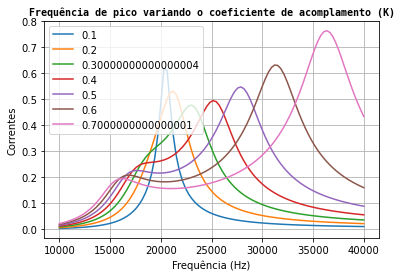

In [117]:
lista_I2 = []
k = np.arange(0.1, 0.8, 0.1)
lista_f = np.linspace(10e3, 40e3, 100)

for i in range(len(k)):
  
  lista_I2.append([])
  for f in lista_f:
    w = 2*math.pi*f
    lista_I2[i].append(parametros(w,k[i])[1])

  
  plt.plot(lista_f, np.abs(lista_I2[i]), label = (k[i]))

plt.xlabel("Frequência (Hz)")
plt.ylabel("Correntes")
plt.title("Frequência de pico variando o coeficiente de acomplamento (K)",fontsize=10 ,fontfamily = 'monospace',fontweight = 'semibold',color='k')
plt.legend(loc='best', prop={'size': 10})
plt.grid(True)
plt.show()


## Etapa 1 - Parte 4

#### Nessa etapa, é possível analisar o comportamento do circuito para 6 indutâncias diferentes, variando também os valores de frequência, e assumindo uma Capacitância de forma que tal frequência seja a frequência de ressonância.

- Considere : 
                    $$ C = \frac{1}{4 . Pi . 2 . f^2 . L}$$


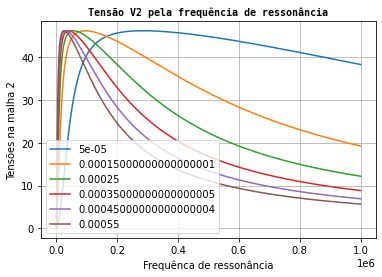

In [118]:
list_L = np.linspace(50e-6,550e-6,6) #lista de indutâncias
l_fres = np.linspace(10, 10e5, 1000) #lista de frequências de ressonância indo de 10kHz até 100KHz

k = 0.1

for L in list_L:

    l_V2 = []
    for f in l_fres:
        C = 1 / (4*L*(np.pi*f)**2) # Capacitância dada a frequência de ressonância e Indutância do circuito
        
        I1, I2, V2, _ = parametros(L1 = L,L2=L,C1=C,C2=C,w=(f*2*np.pi),k=0.1) #correntes
        l_V2.append(abs(V2))
        
    
    
    plt.plot(l_fres, l_V2, label = L)
    plt.xlabel("Frequênca de ressonância")
    plt.ylabel("Tensões na malha 2")
plt.title("Tensão V2 pela frequência de ressonância",fontsize=10 ,fontfamily = 'monospace',fontweight = 'semibold',color='k')
plt.legend(loc='best', prop={'size': 10})
plt.grid(True)
plt.show()

## Etapa 1 - Parte 5

#### Nessa etapa, será observado como a transferência de energia é máxima, plota-se o gráfico da potência de entrada e de saída pela frequência da fonte. Além da potência, é muito importante analisar a eficiência (rendimento) do circuito.

- Para construção deste gráfico foi feito uma lista de frequências entre 10kHz e 50kHz, e para cada frequência foi calculado a potência através da formula: 

$$ P = \frac {V2} {\frac {\sqrt{2} . I1} {\sqrt{2}} } $$

- Após isso foi calculado o $\omega$ (velocidade angular) através da formula:

$$ \omega = 2 . Pi . f $$

- Com isso foi possivel calcular a impedancia do circuito através da formula:

$$ Z = \frac {\frac{1}{j . \omega . C} . Rc} {Rc + \frac{1}{j . \omega . C} } $$

- Após foi calculado o valor da tensão V de carga através da formula:

$$ Vc = I2 . Z $$

- Ao fim disso foi calculado a potência de carga através da formula:

$$ P = \frac {Vc} {\frac {\sqrt{2} . I2} {\sqrt{2}} } $$


Variando a frequência, a potência máxima de saída é  f = 20435.30435304353 Hz.


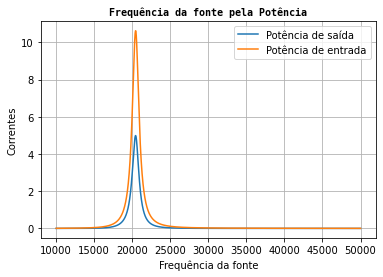

No handles with labels found to put in legend.


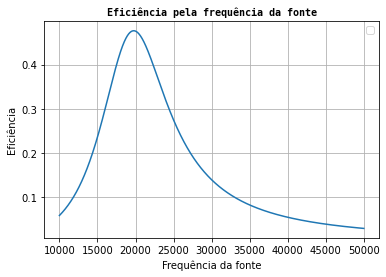

In [119]:
lista_f = np.linspace(10e3, 50e3, 100000) #lista de frequênca das fontes
lista_Poti = [] #lista de potências de entrada
lista_Pots = [] #Lista de potências de saída
lista_n = [] #Lista de eficiências para cada frequência
#plt.figure(figsize = (15,10))  


for f in lista_f:
    I1, I2, V2, _ = parametros(2*np.pi*f,k,V_1,R_C, R_1, R_2, L_1, L_2, C_1, C_2) # correntes
    
    #cálulo da potência total
    S1 = V_1*I1.conjugate()/2
    S2 = V2*I2.conjugate()/2
    
    #cálculo da potência 
    POT1 = np.real(S1)  # Potência efetiva (parte real) de S1
    POT2 = np.real(S2)  # Potência efetiva (parte real) de S2
    
    #cálculo das Eficiências
    n = (POT2/POT1) # em %
    
    #acrescentando nas respectivas listas
    lista_Poti.append(POT1)  # Adicionar POT1 à lista de potências de entrada
    lista_Pots.append(POT2)  # Adicionar POT2 à lista de potências de saída
    lista_n.append(n)

index = lista_Pots.index(max(lista_Pots))
freq = lista_f[index]
print(f"Variando a frequência, a potência máxima de saída é  f = {freq} Hz.")

plt.plot(lista_f, lista_Pots, label= "Potência de saída")
plt.plot(lista_f, lista_Poti, label = "Potência de entrada")
plt.xlabel("Frequência da fonte")
plt.ylabel("Correntes")
plt.title("Frequência da fonte pela Potência",fontsize=10 ,fontfamily = 'monospace',fontweight = 'semibold',color='k')
plt.legend(loc='best', prop={'size': 10})
plt.grid(True)
plt.show()


plt.plot(lista_f, lista_n)
plt.xlabel("Frequência da fonte")
plt.ylabel("Eficiência")
plt.title("Eficiência pela frequência da fonte",fontsize=10 ,fontfamily = 'monospace',fontweight = 'semibold',color='k')
plt.legend(loc='best', prop={'size': 10})
plt.grid(True)
plt.show()


## Etapa 1 - Parte 6

##### Gráfico: Tensão na Carga x K (constante de acoplamento)

Utilizando a frequência de ressonância natural do conjunto 𝐿𝐶, que ficará fixa para diferentes valores de 𝑘. A ideia, com a simulação, é identificar se existe um fator de acoplamento ótimo, com o qual a tensão no secundário é máxima (e, por conseguinte, a potência recebida também será máxima).

Para a construção deste gráfico foi feito uma lista de k's, e para cada k foi calculado a tensão Vcarga através da fórmula:

$$ Z = \frac {\frac{1}{j . \omega . C} . Rc} {Rc + \frac{1}{j . \omega . C} } $$

$$ Vc = I2 . Z $$


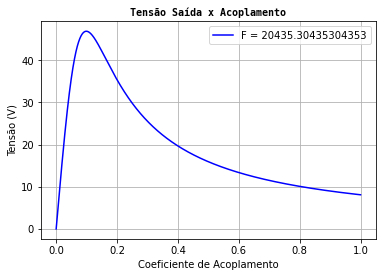

In [120]:
f = freq
lista_k = np.linspace(0,1,100000)
lista_v = []
for k in lista_k:
    I1,I2,V2,IC = parametros(2*math.pi*f,k)
    lista_v.append(abs(V2))

plt.plot(lista_k,np.abs(lista_v),'b',label = (f"F = {f}"))
plt.title('Tensão Saída x Acoplamento',fontsize=10 ,fontfamily = 'monospace',fontweight = 'semibold',color='k')
plt.legend(loc='best', prop={'size': 10})
plt.legend()
plt.ylabel("Tensão (V)")
plt.xlabel("Coeficiente de Acoplamento")
plt.grid(True)
plt.show()

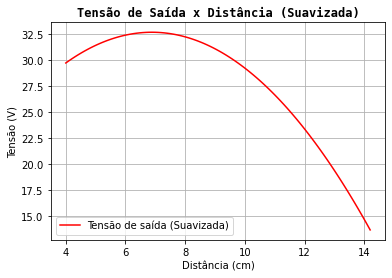

In [126]:
import numpy as np
import matplotlib.pyplot as plt

# Dados
volt = [28.5, 30.6, 35, 30, 25, 20.1, 15.2]
dist = [4, 4.4, 6.8, 9.5, 11.5, 12.2, 14.2]

# Ajuste polinomial de grau 2 (pode ajustar o grau conforme necessário)
coefficients = np.polyfit(dist, volt, 2)
polynomial = np.poly1d(coefficients)

# Geração de pontos suavizados
smooth_dist = np.linspace(min(dist), max(dist), 100)
smooth_volt = polynomial(smooth_dist)

# Plotagem dos dados originais e curva suavizada
plt.plot(smooth_dist, smooth_volt, 'r', label="Tensão de saída (Suavizada)")

# Configurações do gráfico
plt.title('Tensão de Saída x Distância (Suavizada)', fontsize=12, fontfamily='monospace', fontweight='semibold', color='k')
plt.legend(loc='best', prop={'size': 10})
plt.ylabel("Tensão (V)")
plt.xlabel("Distância (cm)")
plt.grid(True)

# Exibição do gráfico
plt.show()
